In [1]:
# Import libs


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import statsmodels.formula.api as smf

from scipy import stats

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import linear_model, svm, gaussian_process
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import lightgbm as lgb

from sklearn import preprocessing
from sklearn import utils

import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("../input"))

['train.csv', 'merchants.csv', 'sample_submission.csv', 'test.csv', 'historical_transactions.csv', 'Data_Dictionary.xlsx', 'new_merchant_transactions.csv']


In [2]:
# Import models

# 1) GradientBoostingRegressor Model
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
GBR = GradientBoostingRegressor()

# 2) Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# 3) Aplly Random Forest Model
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100)

# 4) Aplly XGBOOST Model
from xgboost import XGBClassifier
XGB = XGBClassifier()

# 5) Aplly KNeighbors Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# 6) Aplly SVC Model
SVC = SVC(probability=True)

# 7) Aplly Decision Tree Model
DTC = DecisionTreeClassifier()

# 8) Aplly GaussianNB Model
GNB = GaussianNB()

# 9) Aplly Neural Model
NN = MLPClassifier(hidden_layer_sizes=(100,100,50))

# 10) Aplly lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

# 11) Apply Elastic Net
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

# 12) Apply Kernel Ridge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

# 13) Apply LGBMRegressor
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [3]:
# Read Dataframes

# Read in the dataframes
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
merch = pd.read_csv('../input/merchants.csv')
hist = pd.read_csv('../input/historical_transactions.csv')
sample = pd.read_csv('../input/sample_submission.csv')

df_train_original = train
df_test_original = test

In [4]:
# Shapes

# Print data shapes
print('Files Load!!!')
print('sample submission shape', sample.shape)

# Train and Test
print('* * * Merchant File * * * ')
print('merchants shape', merch.shape)

# Historical File
print('* * * Historical File * * * ')
print('historical_transactions', hist.shape)

# Train and Test
print('* * * Train and Test File * * * ')
print('Train File - Original: ', train.shape)
print('Test File - Original: ', test.shape)

Files Load!!!
sample submission shape (123623, 2)
* * * Merchant File * * * 
merchants shape (334696, 22)
* * * Historical File * * * 
historical_transactions (29112361, 14)
* * * Train and Test File * * * 
Train File - Original:  (201917, 6)
Test File - Original:  (123623, 5)


In [5]:
# Drop columns

train = train.fillna(0)
test = test.fillna(0)

train['first1'] = train['first_active_month'].str[0:4]
train['first2'] = train['first_active_month'].str[5:7]
train = train.fillna(0)
train['first1'] = train['first1'].astype(int)
train['first2'] = train['first2'].astype(int)

test['first1'] = test['first_active_month'].str[0:4]
test['first2'] = test['first_active_month'].str[5:7]
test = test.fillna(0)
test['first1'] = test['first1'].astype(int)
test['first2'] = test['first2'].astype(int)

train = train.drop(['first_active_month'], axis=1)
test = test.drop(['first_active_month'], axis=1)

In [6]:
# Train and Test
print('Train File - Depois de todas Ops: ', train.shape)
print('Test File - Depois de todas Ops: ', test.shape)

all_data = pd.concat((train.loc[:,'card_id':'first2'],
                      test.loc[:,'card_id':'first2']))

print('Após concatenar os arquivos: ', all_data.shape)

Train File - Depois de todas Ops:  (201917, 7)
Test File - Depois de todas Ops:  (123623, 6)
Após concatenar os arquivos:  (325540, 7)


In [7]:
# Substitui os campos nulos pelas médias da coluna em questão
all_data = all_data.fillna(all_data.mean())

In [8]:
all_data = all_data.fillna(0)

In [9]:
all_data

,card_id,feature_1,feature_2,feature_3,first1,first2,target
0,C_ID_92a2005557,5,2,1,2017,6,-0.820283
1,C_ID_3d0044924f,4,1,0,2017,1,0.392913
2,C_ID_d639edf6cd,2,2,0,2016,8,0.688056
3,C_ID_186d6a6901,4,3,0,2017,9,0.142495
4,C_ID_cdbd2c0db2,1,3,0,2017,11,-0.159749
5,C_ID_0894217f2f,4,2,0,2016,9,0.871585
6,C_ID_7e63323c00,3,2,1,2016,12,0.230129
7,C_ID_dfa21fc124,3,2,1,2017,9,2.135850
8,C_ID_fe0fdac8ea,2,1,0,2017,8,-0.065406
9,C_ID_bf62c0b49d,2,2,0,2016,8,0.300062


In [10]:
# Substituindo

hist = hist.fillna(0)
DfhtGroup = pd.DataFrame()

print('# # # # # GERANDO CAMPOS DO HISTÓRICO # # # # #')

print('01 - Gerando o campo card_id')
ListGroup = hist.groupby(['card_id'])['card_id'].count()
DfhtGroup['card_id'] = ListGroup.index

print('02 - Gerando o campo pur_mean')
ListGroup = pd.DataFrame(hist.groupby(['card_id'], as_index=False)['purchase_amount'].mean())
DfhtGroup['pur_mean'] = ListGroup['purchase_amount']

print('03 - Gerando o campo Mon_mean')
ListGroup = pd.DataFrame(hist.groupby(['card_id'], as_index=False)['month_lag'].mean())
DfhtGroup['Mon_mean'] = ListGroup['month_lag']

print('04 - Gerando o campo Count')
ListGroup = pd.DataFrame(hist.groupby(['card_id'], as_index=False)['authorized_flag'].count())
DfhtGroup['Count'] = ListGroup['authorized_flag']

print('13 - Gerando o campo merchant_id - sera usado no Join')
ListGroup = pd.DataFrame(hist.groupby('card_id', as_index=False)['merchant_id'].agg(lambda x: x.value_counts().index[0]))
DfhtGroup['merchant_id'] = ListGroup['merchant_id']

print ('Shape do Df principal - all_data: ', all_data.shape)
print ('Shape do Df com campos do histórico - DfhtGroup: ', DfhtGroup.shape)
print ('Shape do Df com campos de Mercados - merch: ', merch.shape)

dfJoin  = pd.DataFrame()
dfJoin  = pd.merge(all_data, DfhtGroup, on='card_id')
dfJoin  = dfJoin.fillna(0)

all_data = dfJoin

print ('All_data depois do primeiro (Historico): ', all_data.shape)

merch = merch.fillna(0)
merch2 = merch.drop_duplicates(subset=['merchant_id'], keep=False)

merged = pd.DataFrame()
merged = all_data.merge(merch2, indicator=True, how='outer')
Tot_merged = merged[merged['_merge'] != 'left_only']
Tot_merged = merged[merged['_merge'] != 'right_only']

all_data_sel = all_data

# Campos que não precisam de transformação - serão transformados no Get Dummies:
all_data_sel['most_recent_sales_range'] = Tot_merged['most_recent_sales_range']
all_data_sel['most_recent_purchases_range'] = Tot_merged['most_recent_purchases_range']

# Campos que são númericos mas deveriam ser categoricos: tranformar em str e depois passar Get Dummies
#all_data_sel['subsector_id'] = Tot_merged['subsector_id'].astype(str)
#all_data_sel['city_id'] = Tot_merged['city_id'].astype(str)
#all_data_sel['state_id'] = Tot_merged['state_id'].astype(str)

all_data = all_data_sel

print ('All_data depois do segundo Join (Mercado): ', all_data.shape)

# # # # # GERANDO CAMPOS DO HISTÓRICO # # # # #
01 - Gerando o campo card_id
02 - Gerando o campo pur_mean
03 - Gerando o campo Mon_mean
04 - Gerando o campo Count
13 - Gerando o campo merchant_id - sera usado no Join
Shape do Df principal - all_data:  (325540, 7)
Shape do Df com campos do histórico - DfhtGroup:  (325540, 5)
Shape do Df com campos de Mercados - merch:  (334696, 22)
All_data depois do primeiro (Historico):  (325540, 11)
All_data depois do segundo Join (Mercado):  (325540, 13)


In [11]:
all_data

,card_id,feature_1,feature_2,feature_3,first1,first2,target,pur_mean,Mon_mean,Count,merchant_id,most_recent_sales_range,most_recent_purchases_range
0,C_ID_92a2005557,5,2,1,2017,6,-0.820283,-0.638341,-3.911538,260,M_ID_1a81c358a3,C,B
1,C_ID_3d0044924f,4,1,0,2017,1,0.392913,-0.600018,-5.031429,350,M_ID_940fb4498f,C,B
2,C_ID_d639edf6cd,2,2,0,2016,8,0.688056,-0.678311,-8.604651,43,M_ID_5634fd83e0,C,B
3,C_ID_186d6a6901,4,3,0,2017,9,0.142495,-0.642745,-2.831169,77,M_ID_00a6ca8a8a,C,B
4,C_ID_cdbd2c0db2,1,3,0,2017,11,-0.159749,-0.366073,-1.285714,133,M_ID_cecefd9589,C,B
5,C_ID_0894217f2f,4,2,0,2016,9,0.871585,-0.417462,-2.545455,33,M_ID_12637a44e9,C,B
6,C_ID_7e63323c00,3,2,1,2016,12,0.230129,-0.713160,-6.646154,260,M_ID_548f18cdd2,C,B
7,C_ID_dfa21fc124,3,2,1,2017,9,2.135850,-0.616629,-1.727273,22,M_ID_00a6ca8a8a,C,B
8,C_ID_fe0fdac8ea,2,1,0,2017,8,-0.065406,-0.580558,-4.200000,15,M_ID_b9dcf28cb9,C,B
9,C_ID_bf62c0b49d,2,2,0,2016,8,0.300062,-0.681390,-5.876106,113,M_ID_6cb0602e94,C,B


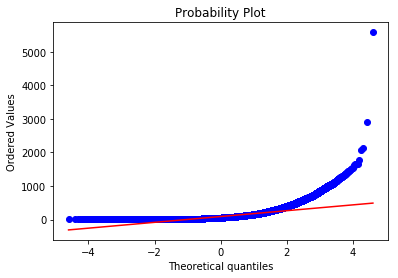

(325540, 13)

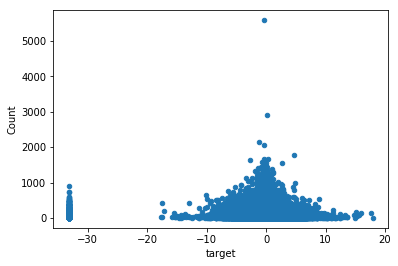

In [12]:
fig = plt.figure()
res = stats.probplot(all_data['Count'] , plot=plt)
plt.show()
all_data.plot.scatter(x='target', y='Count');
all_data.shape

In [13]:
all_data_temp = all_data[all_data['Count'] < 1500]

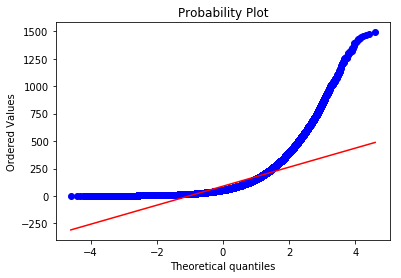

(325527, 13)

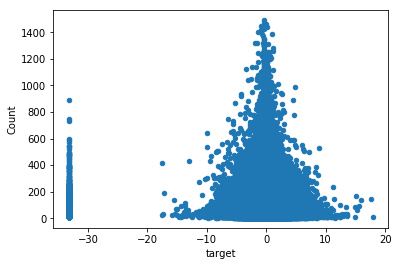

In [14]:
fig = plt.figure()
res = stats.probplot(all_data_temp['Count'] , plot=plt)
plt.show()
all_data_temp.plot.scatter(x='target', y='Count');
all_data_temp.shape

In [15]:
all_data_temp = all_data_temp[all_data_temp['target'] < 12]
all_data_temp = all_data_temp[all_data_temp['target'] > -12]

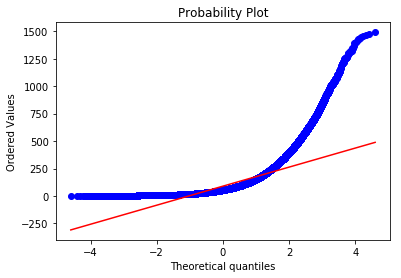

(323273, 13)

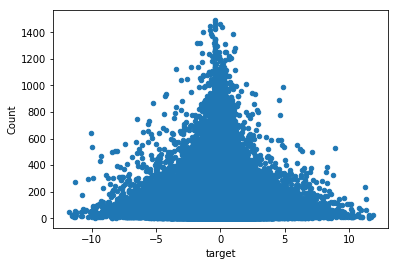

In [16]:
fig = plt.figure()
res = stats.probplot(all_data_temp['Count'] , plot=plt)
plt.show()
all_data_temp.plot.scatter(x='target', y='Count');
all_data_temp.shape

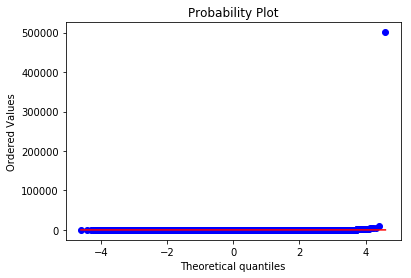

(323273, 13)

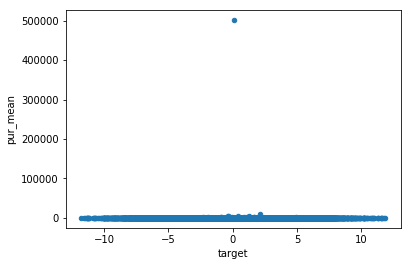

In [17]:
fig = plt.figure()
res = stats.probplot(all_data_temp['pur_mean'] , plot=plt)
plt.show()
all_data_temp.plot.scatter(x='target', y='pur_mean');
all_data_temp.shape

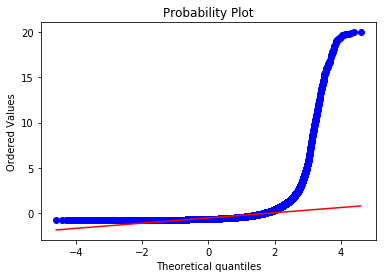

(322698, 13)

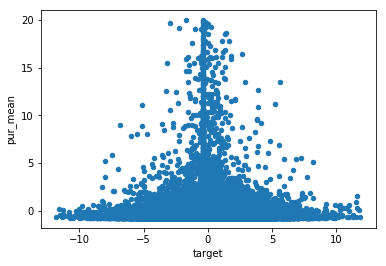

In [18]:
all_data_temp = all_data_temp[all_data_temp['pur_mean'] < 20]

fig = plt.figure()
res = stats.probplot(all_data_temp['pur_mean'] , plot=plt)
plt.show()
all_data_temp.plot.scatter(x='target', y='pur_mean');
all_data_temp.shape

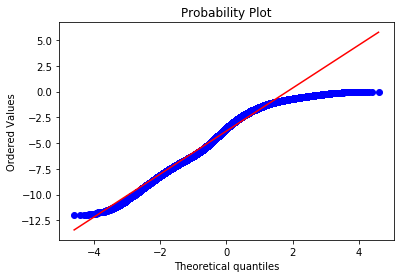

(322670, 13)

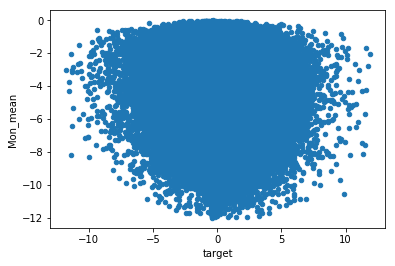

In [19]:
all_data_temp = all_data_temp[all_data_temp['Mon_mean'] > -12]

fig = plt.figure()
res = stats.probplot(all_data_temp['Mon_mean'] , plot=plt)
plt.show()
all_data_temp.plot.scatter(x='target', y='Mon_mean');
all_data_temp.shape

In [20]:
all_data = all_data.drop(['card_id'], axis=1)
all_data = all_data.drop(['target'], axis=1)
all_data = all_data.drop(['merchant_id'], axis=1)
#all_data = all_data.drop(['merchant_group_id'], axis=1)

# Get_Dummies para transformar categoricos em Numéricos 
all_data  = all_data.fillna(0)
all_data = pd.get_dummies(all_data)

print('all_data - Depois de todos processamentos: ', all_data.shape)

#Cria Matriz X_train utilizando a Matriz com todos os dados all_data: do inicio da matriz (:) até o fim  da matriz df_train.shape[0]
X_train = all_data[:train.shape[0]]

#Cria Matriz X_test utilizando a Matriz com todos os dados all_data: a partir do último registro matriz df_train.shape[0], ou seja, todos os registros que não estiverem em df_train
X_test = all_data[train.shape[0]:]

# Cria o y, ou seja, o que será previsto, apenas com o campo "Target"
y = df_train_original.target

all_data - Depois de todos processamentos:  (325540, 20)


In [21]:
# Function declaration 

def RunModel (ModelName, Model, Df_Test_Original, X_train, X_test, y):

    print ('# # # # Prediction for Model:  ', ModelName, '# # # #')
    print ('Shape X_train: ', X_train.shape)
    print ('Shape X_test: ', X_test.shape)
    print ('Shape y: ', y.shape)
    print ('Model: ', Model)
    
    print ('.FIT Model: ', Model)

    Model.fit(X_train, y)

    print ('PREDICT TRAIN: ', Model)

    yhat_Train = Model.predict(X_train)
    
    print ('PREDICT TEST: ', Model)

    yhat_test = Model.predict(X_test)
    
    print ('# # # # Tamanho do Df_Test_Original:', Df_Test_Original.shape)
    print ('# # # # Prediction:', yhat_test.shape, yhat_test)

    Filename = 'Output_' + ModelName + '.csv'
    
    df_Output= pd.DataFrame()
    df_Output['card_id'] = Df_Test_Original['card_id']
    df_Output['target'] = yhat_test
    df_Output.to_csv(Filename, index = False)
    
    return yhat_test

def Bagging (ModelName, Model, Df_Test_Original, X_train, X_test, y):

    from sklearn.ensemble import BaggingClassifier
    n_estimators = [1,2,3,4,5,10,15,20]
    dt_bag_scores = []   
    lr_bag_scores = []
    for ne in n_estimators:
        dt = DecisionTreeClassifier(max_depth=15, random_state=1)
        lr = LogisticRegression(random_state=1)
    
        dt_bag = BaggingClassifier(dt, n_estimators=ne)
        lr_bag = BaggingClassifier(lr, n_estimators=ne)

        dt_bag.fit(X_train, y)
        lr_bag.fit(X_train, y)

        dt_bag_scores.append(eval_auc(dt_bag, X_test, yhat_test))
        lr_bag_scores.append(eval_auc(lr_bag, X_test, yhat_test))

        print(ne, dt_bag_scores[-1], lr_bag_scores[-1])

def GridSearch (ModelName, Model, Df_Test_Original, X_train, X_test, y):
    from sklearn.model_selection import GridSearchCV
    params = {"max_depth": [3,10,None],"max_features": [None, "auto"],"min_samples_leaf": [1, 5, 10],"min_samples_split": [2, 10]         }
    gsdt = GridSearchCV(dt, params, n_jobs=-1, cv=5)
    gsdt.fit(X_train, y)
    display ('Best Parameters!!: ',  gsdt.best_params_)
    display ('Best Score     !!: ',  gsdt.best_score_)
    bdt.get_params()
    params = {"base_estimator__max_depth": [3,10,None],"base_estimator__max_features": [None, "auto"],"base_estimator__min_samples_leaf": [1, 5, 10],"base_estimator__min_samples_split": [2, 10],'bootstrap_features': [False, True],'max_features': [0.5, 1.0],'max_samples': [0.5, 1.0],'n_estimators': [5, 15, 40],         }
    gsbdt = GridSearchCV(bdt, params, n_jobs=3, cv=5)
    gsbdt.fit(X_train, y)
    display ('Best Parameters!!: ',  gsdt.best_params_)
    display ('Best Score     !!: ',  gsdt.best_score_)
#
# ! ! ! ! ! ! ! 
#
def Runlightgbm  (ModelName, Model, Df_Test_Original, X_train, X_test, y):

    print ('# # # # Prediction for Model:  ', ModelName, '# # # #')
    print ('Shape X_train: ', X_train.shape)
    print ('Shape X_test: ', X_test.shape)
    print ('Shape y: ', y.shape)
    print ('Model: ', Model)

    import lightgbm as lgb
    d_train = lgb.Dataset(X_train, label=y)
    
    params ={
                'task': 'train',
                'boosting': 'goss',
                'objective': 'regression',
                'metric': 'rmse',
                'learning_rate': 0.01,
                'subsample': 0.9855232997390695,
                'max_depth': 7,
                'top_rate': 0.9064148448434349,
                'num_leaves': 63,
                'min_child_weight': 41.9612869171337,
                'other_rate': 0.0721768246018207,
                'reg_alpha': 9.677537745007898,
                'colsample_bytree': 0.5665320670155495,
                'min_split_gain': 9.820197773625843,
                'reg_lambda': 8.2532317400459,
                'min_data_in_leaf': 21,
                'verbose': -1,
                'seed':int(2),
                'bagging_seed':int(2),
                'drop_seed':int(2)
                }
    
    print ('.FIT Model (Nesse caso, lgb.train: ', Model)

    clf = lgb.train(params, d_train)

    print ('PREDICT TEST: ', Model)

    yhat_test=clf.predict(X_test)
    
    print ('# # # # Tamanho do Df_Test_Original:', Df_Test_Original.shape)
    print ('# # # # Prediction:', yhat_test.shape, yhat_test)

    Filename = 'Output_' + ModelName + '.csv'
    
    df_Output= pd.DataFrame()
    df_Output['card_id'] = Df_Test_Original['card_id']
    df_Output['target'] = yhat_test
    df_Output.to_csv(Filename, index = False)
    
    return yhat_test

In [ ]:
# 0) Let's Bagging:
Sel_Model = 'Bagging'
NameM = 'Bagging'
#Bagging(NameM, Sel_Model, df_test_original, X_train, X_test, df_train_original['target'])

In [ ]:
# 0) Grid Search:
Sel_Model = 'GridS'
NameM = 'GridS'
#GridSearch(NameM, Sel_Model, df_test_original, X_train, X_test, df_train_original['target'])

In [23]:
# -1) Run Runlightgbm:
Sel_Model = lgb
NameM = 'lgb'
#Runlightgbm(NameM, Sel_Model, df_test_original, X_train, X_test, y)

In [24]:
# 1) Gradiente Boost Model
Sel_Model = GBR
NameM = 'GBR'
MGBR = RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

# # # # Prediction for Model:   GBR # # # #
Shape X_train:  (201917, 20)
Shape X_test:  (123623, 20)
Shape y:  (201917,)
Model:  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
.FIT Model:  GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0

In [ ]:
# 4) xgboost Model (Megazord) XD - Didn't run, Kernel died
Sel_Model = XGB
NameM = 'XgBoost'
#RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

In [ ]:
# 8) Gaussian is not possible - Unknown label type
Sel_Model = GNB
NameM = 'Gaussian'
#RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

In [ ]:
# 8) Gaussian is not possible - Unknown label type
Sel_Model = GNB
NameM = 'Gaussian'
#RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

In [ ]:
# 9) Neural Model is not possible - Unknown label type
Sel_Model = NN
NameM = 'NeuralModel'
#RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

In [31]:
# 10) lasso
Sel_Model = lasso
NameM = 'lasso'
#MLASSO = RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

In [32]:
# 11) Elastic Net
Sel_Model = ENet
NameM = 'ElasticNet'
#MENET = RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

In [ ]:
# 12) Kernel Ridge - Error Unknow
Sel_Model = KRR
NameM = 'NeuralModel'
#RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

In [28]:
# 13) LGBMRegressor
Sel_Model = model_lgb
NameM = 'LGBMRegressor'
LGBMR = RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

# # # # Prediction for Model:   LGBMRegressor # # # #
Shape X_train:  (201917, 20)
Shape X_test:  (123623, 20)
Shape y:  (201917,)
Model:  LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=720, n_jobs=-1, num_leaves=5, objective='regression',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
.FIT Model:  LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.2319, feature_fraction_seed=9,
       importance_type='split', learning_r

In [ ]:
# 14) Linear Regression
Sel_Model = LR
NameM = 'LinearRegression'
#RunModel(NameM, Sel_Model, df_test_original, X_train, X_test, y)

In [34]:
#15) Ensemble with best values
ensemble = MGBR*0.50 + LGBMR*0.50

ModelName = 'Ensemble'
Filename = 'Output_' + ModelName + '.csv'
    
df_Output= pd.DataFrame()
df_Output['card_id'] = df_test_original['card_id']
df_Output['target'] = ensemble